# Analysis of Life Expectancy

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# maybe install
!pip install openpyxl

## 1. Read the Spreadsheet

In [6]:
df = pd.read_excel("gapminder_lifeexpectancy.xlsx", index_col=0)

In [8]:
df.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, Abkhazia to South Sudan
Columns: 217 entries, 1800 to 2016
dtypes: float64(217)
memory usage: 442.8+ KB


In [10]:
df.shape

(260, 217)

In [ ]:
# IP 172.17.210.142 or 192.168.32.1

## 2. Measures of Centrality

In [11]:
col = df.iloc[:, -1]  # select all rows and last col

In [18]:
round(float(col.mean()), 1)

72.6

In [19]:
round(float(col.median()), 1)

74.5

In [20]:
col.mode()  # not too useful with a float column

0    74.8
1    76.5
2    77.8
3    79.1
4    79.6
Name: 2016, dtype: float64

In [ ]:
# IP 172.17.210.142 or 192.168.32.1

### 3. Measures of Dispersion

In [22]:
# range
float(col.max() - col.min())

35.94

In [23]:
round(float(col.std()), 1)

7.7

The mean life expectancy in 2016 was 72.6 years with a standard deviation of 7.7 years.

In [24]:
col.describe()

count    208.000000
mean      72.556635
std        7.738535
min       48.860000
25%       67.175000
50%       74.500000
75%       78.650000
max       84.800000
Name: 2016, dtype: float64

## 4. Plots

### Bar Chart

<Axes: ylabel='Life expectancy'>

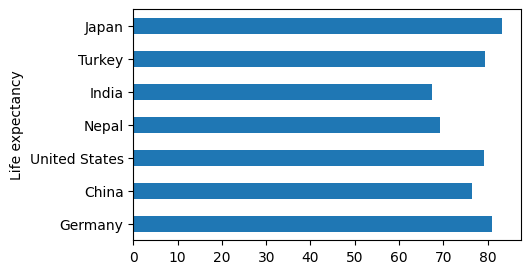

In [33]:
subset = col.loc[["Germany", "China", "United States",
                  "Nepal", "India", "Turkey", "Japan"]]
subset.plot.barh(figsize=(5,3))  # or .bar()

### Line Chart

<Axes: >

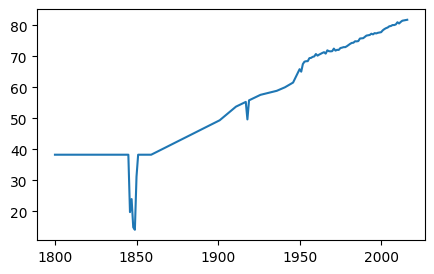

In [38]:
# typical use:  x-axis is time
df.loc["Ireland"].plot(figsize=(5, 3))

<Axes: >

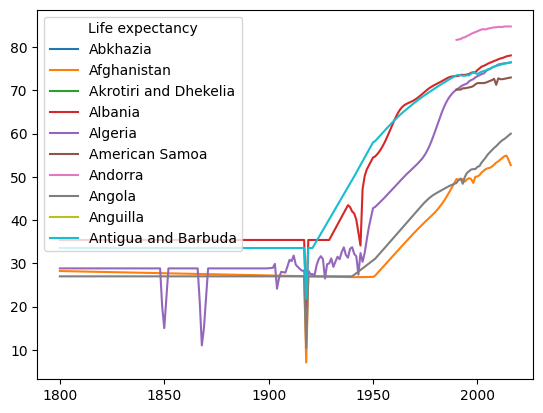

In [41]:
df.iloc[:10, :].transpose().plot()

<Axes: xlabel='Life expectancy'>

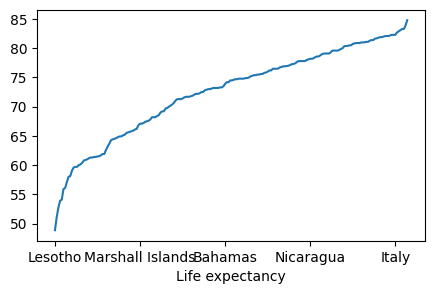

In [36]:
col = col.dropna().sort_values()  # rank countries by life expectancy
col.plot(figsize=(5, 3))  # measured in inches

### Box Plot

<Axes: >

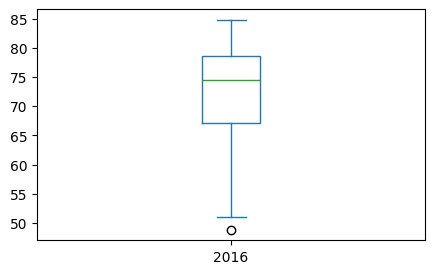

In [42]:
# shows: quartiles, median and outliers
col.plot.box(figsize=(5,3))

<Axes: >

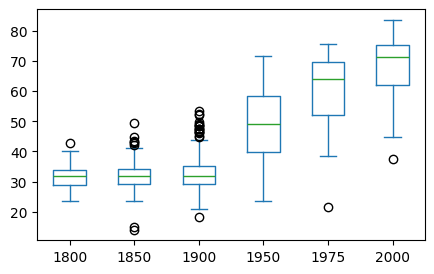

In [45]:
df[[1800, 1850, 1900, 1950, 1975, 2000]].plot.box(figsize=(5,3))

In [47]:
df[1975].sort_values().head()

Life expectancy
Cambodia       21.69
Mali           38.39
Ethiopia       38.78
Niger          39.57
Afghanistan    39.61
Name: 1975, dtype: float64

### Histogram

<Axes: xlabel='2016', ylabel='Count'>

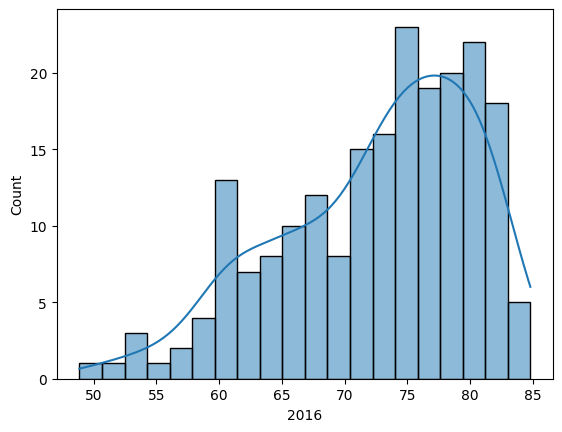

In [56]:
#col.hist(figsize=(5,3))
sns.histplot(col, bins=20, kde=True)  # kde: Kernel Density Estimator

## 5. Grouping

In [61]:
# mean life exp for each first character separately
col.groupby(col.index.str[0]).mean().head(5)

Life expectancy
A    74.313077
B    72.179444
C    71.401053
D    73.427500
E    69.742857
Name: 2016, dtype: float64

In [62]:
col.groupby(col.index.str[0]).count().head(5)

Life expectancy
A    13
B    18
C    19
D     4
E     7
Name: 2016, dtype: int64

In [ ]:
# --> group by 1 or 2 categories and apply a function: Pivot Table